# Worksheet 15

Name:  
UID: 

### Topics

- Support Vector Machines

## Support Vector Machines

a) Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

In [ ]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

# Dataset
X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

# Initializing w and b
w = np.array([1, 1])
b = 0.1

# Perceptron Parameters
epochs = 100
alpha = .05
expanding_rate = .99
retracting_rate = 1.1

def snap(x, w, b, error):
    xplot = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    cs = np.array([x for x in 'gb'])

    svm = (-w[0] * xplot - b) / w[1]
    left_svm = (-w[0] * xplot - b + 1) / w[1]
    right_svm = (-w[0] * xplot - b - 1) / w[1]

    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], color=cs[labels].tolist(), s=50, alpha=0.8)
    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .2, color='r', fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .2, color='y', fill=False))
    ax.plot(xplot, left_svm, 'g--', lw=2)
    ax.plot(xplot, svm, 'r-', lw=2)
    ax.plot(xplot, right_svm, 'b--', lw=2)
    ax.set_xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    ax.set_ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    fig.savefig(TEMPFILE)
    plt.close()

    return im.open(TEMPFILE)


images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    x, y = X[i], Y[i]
    error = False

    # Calculating the prediction and checking for misclassification
    if y * (np.dot(w, x) + b) <= 0:
        error = True
        w = w + alpha * y * x
        b = b + alpha * y

    # Update learning rate alpha
    if error:
        alpha *= retracting_rate
    else:
        alpha *= expanding_rate

    images.append(snap(x, w, b, error))

images[0].save(
    'svm.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)


b) Consider the following dataset:

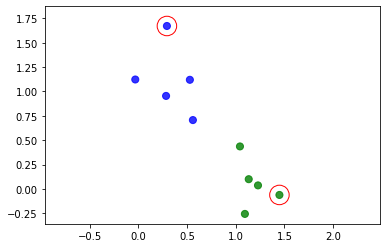

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 1], [1, 0]]
X, _ = datasets.make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0)
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(plt.Circle((X[0][0], X[0][1]), .1, color='r',fill=False))
ax.add_patch(plt.Circle((X[1][0], X[1][1]), .1, color='r',fill=False))
plt.show()

if we fit an SVM to the above dataset, moved the points circled in red, and re-fit the SVM, describe how the fit would change depending on how the points are moved.

If you move a point from '0' (blue) to '1' (green) and it becomes a support vector, the SVM's decision boundary may shift to accommodate this change, as the model tries to maximize the margin between the classes. The decision boundary would likely move closer to the newly positioned point.
If you move a point from '1' (green) to '0' (blue) and it becomes a support vector, the decision boundary may shift in the opposite direction, again aiming to maximize the margin.

c) If we were to fit an SVM to the above dataset, which points do you think would affect the decision boundary the most? Circle them in red.

The top blue one.

In [ ]:
from sklearn.svm import SVC

# Fit an SVM to the dataset
svm = SVC(kernel='linear')
svm.fit(X, Y)

# Get the coordinates of support vectors
support_vectors = svm.support_vectors_

# Plot the data points
_, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[Y].tolist(), s=50, alpha=0.8)

# Circle the support vectors in red
for sv in support_vectors:
    ax.add_patch(plt.Circle((sv[0], sv[1]), 0.1, color='r', fill=False))

ax.set_aspect('equal', adjustable='datalim')
plt.show()
